In [1]:
# Load basic libraries

import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
from pylab import rcParams

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('housing_data.csv')

In [4]:
data.shape

(1418, 13)

In [5]:
data.head(2)

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500


In [6]:
# Remove any unnecessary column 
del data['Id']

In [7]:
data

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1413,6,1999,953,SBrkr,1647,2,Attchd,2,460,NaN,NaN,175000
1414,6,1978,1542,SBrkr,2073,2,Attchd,2,500,MnPrv,NaN,210000
1415,7,1941,1152,SBrkr,2340,2,Attchd,1,252,GdPrv,Shed,266500
1416,5,1950,1078,FuseA,1078,1,NaN,1,240,NaN,NaN,142125


In [8]:
# How many rows and columns
print('Rows:',data.shape[0])
print('Columns:',data.shape[1])

Rows: 1418
Columns: 12


In [9]:
# Explain the five point summary of the data set

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
OverallQual,1418.0,6.114245,1.385858,1.0,5.00,6.0,7.0,10.0
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.0,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.5,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.0,5642.0
FullBath,1418.0,1.565585,0.551127,0.0,1.00,2.0,2.0,3.0
GarageCars,1418.0,1.763752,0.755995,0.0,1.00,2.0,2.0,4.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.0,1418.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.0,755000.0


* Columns salePrice ,GrLivArea , GarageArea , TotalBsmtSF, are right skewed and might have outliers.
* GarageCars, FullBath and OverallQual are number categories.
* Year is age of the Property between 1872 and 2010.

In [11]:
data.describe(include='object').T

,count,unique,top,freq
Electrical,1417,5,SBrkr,1300
GarageType,1275,6,Attchd,800
Fence,270,4,MnPrv,148
MiscFeature,52,4,Shed,47


* Most of the electrical is SBrkr (mode)
* Very few values in Fence and MiscFeature

In [12]:
# Draw a heat map to show the correlation between the features

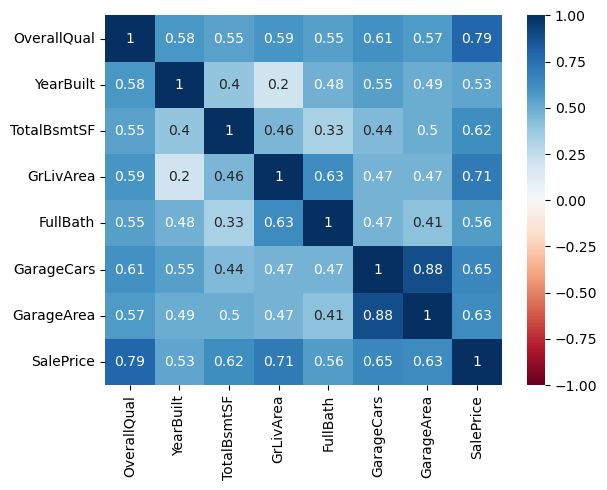

In [13]:
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1,cmap='RdBu');

* the target variable has the max corr with overall quality ground living area and garage area.
* These corr are highly effected by the outliers the values of the corr matrix **might change after treating the outlier**.


Q. seperate the category columns and number columns to perform the univariate analysis.

In [14]:
num_cols = data.select_dtypes(include=np.number).columns
cat_cols = data.select_dtypes(include=object).columns

In [15]:
num_cols = ['YearBuilt','TotalBsmtSF','GrLivArea','GarageArea','SalePrice']

In [16]:
data.columns

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'Electrical', 'GrLivArea',
       'FullBath', 'GarageType', 'GarageCars', 'GarageArea', 'Fence',
       'MiscFeature', 'SalePrice'],
      dtype='object')

In [17]:
cat_cols = ['OverallQual','Electrical','GarageType','FullBath','GarageCars',
           'Fence','MiscFeature']

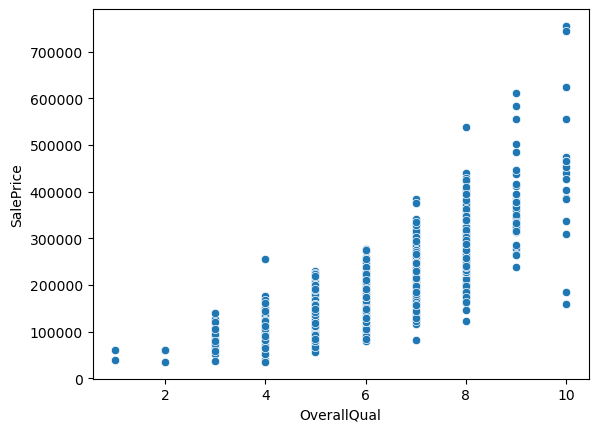

In [18]:
sns.scatterplot(x=data['OverallQual'],y=data['SalePrice']);

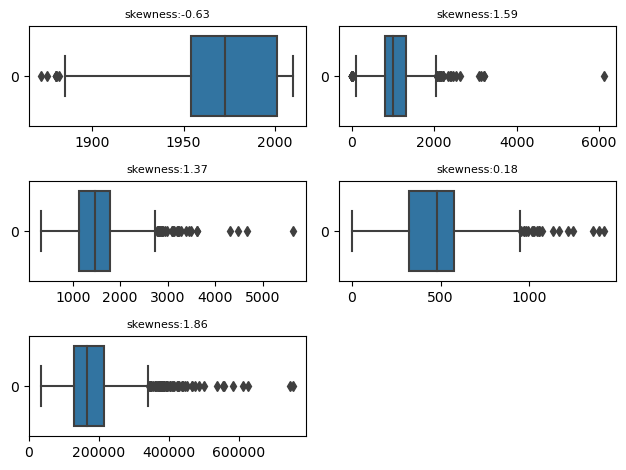

In [19]:
t = 1 
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(data[i],orient='h')
    plt.title(f'skewness:{round(data[i].skew(),2)}',fontsize=8)
    t+=1
plt.tight_layout()
plt.show()

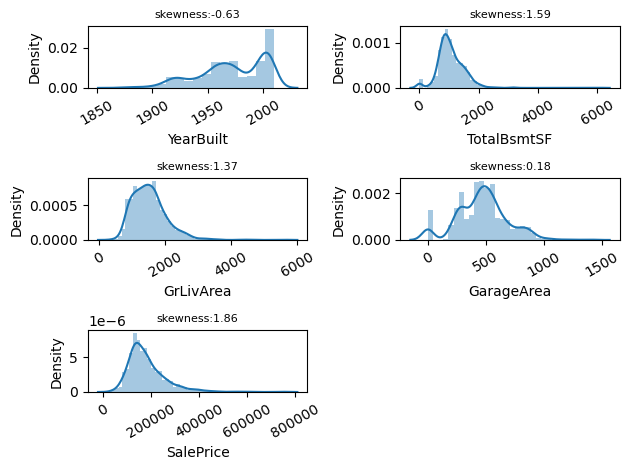

In [20]:
t = 1 
for i in num_cols:
    plt.subplot(3,2,t)
    sns.distplot(data[i])
    plt.title(f'skewness:{round(data[i].skew(),2)}',fontsize=8)
    t+=1
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

**Infernces**
* SalePrice has highly right skewed
* year built is negatively skewed that shows that there are new properties.


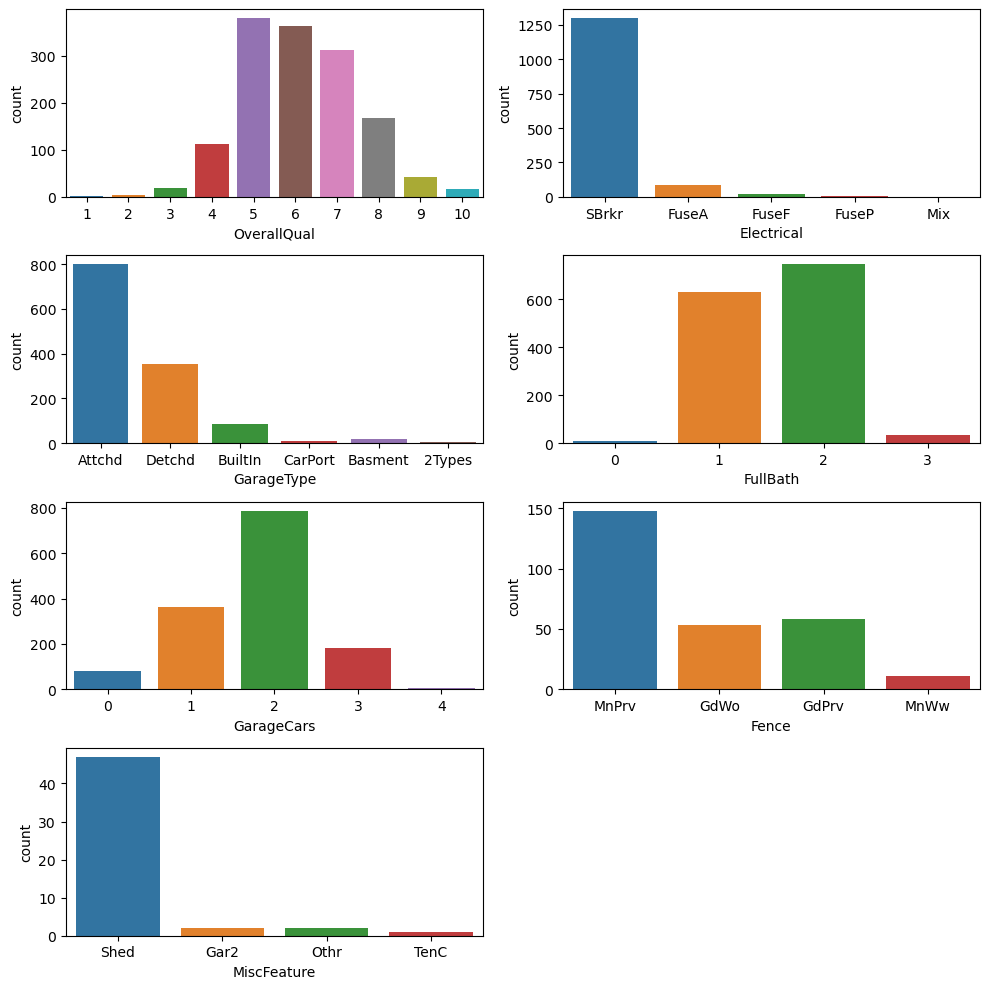

In [21]:
t=1
plt.figure(figsize=(10,10))
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(x=data[i])
    t+=1
plt.tight_layout()
plt.show()

* Most of the house have overall qualty 5,6,7.
* max. houses have 1,2 batrooms 3,4 bathrooms are rare
* max houses have attached garage
* max houses have shed as miscfeatue.
* most of the houses have 1,2 cars parking 
* most common fench is MnpKr

## Bivariate Analysis:

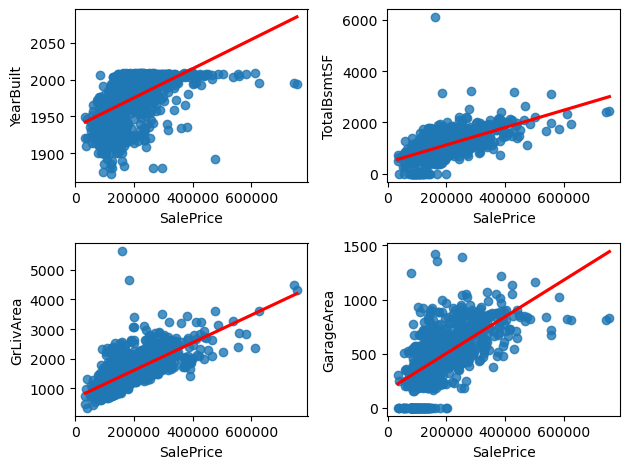

In [22]:
t =1
for i in num_cols:
    if i != 'SalePrice':
        plt.subplot(2,2,t)
        sns.regplot(x=data['SalePrice'],y=data[i],ci=0,line_kws={'color':'red'})
        t+=1
plt.tight_layout()
plt.show()

* As the total basement area increases the sales price increases.
* 

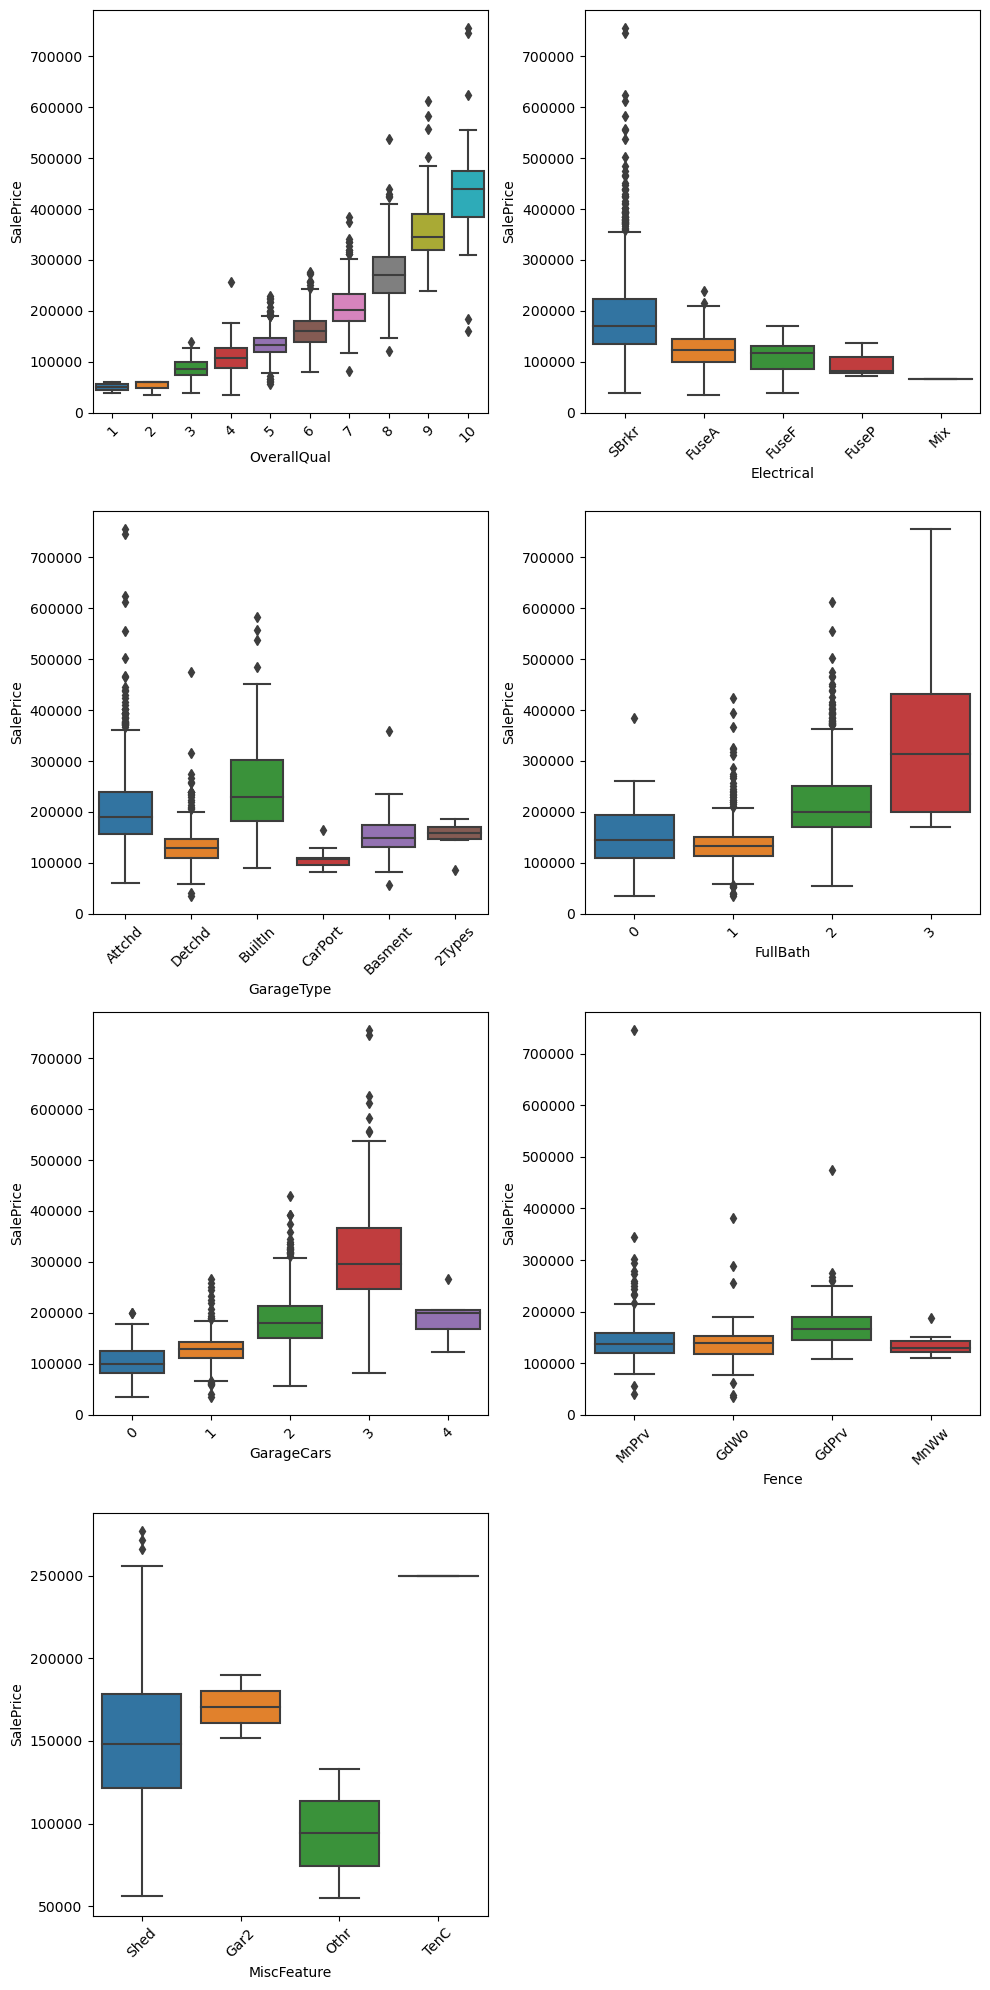

In [23]:
t = 1
plt.figure(figsize=(10,20))
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.boxplot(x=i,y='SalePrice',data=data)
    plt.xticks(rotation=45)
    t+=1
plt.tight_layout()
plt.show()

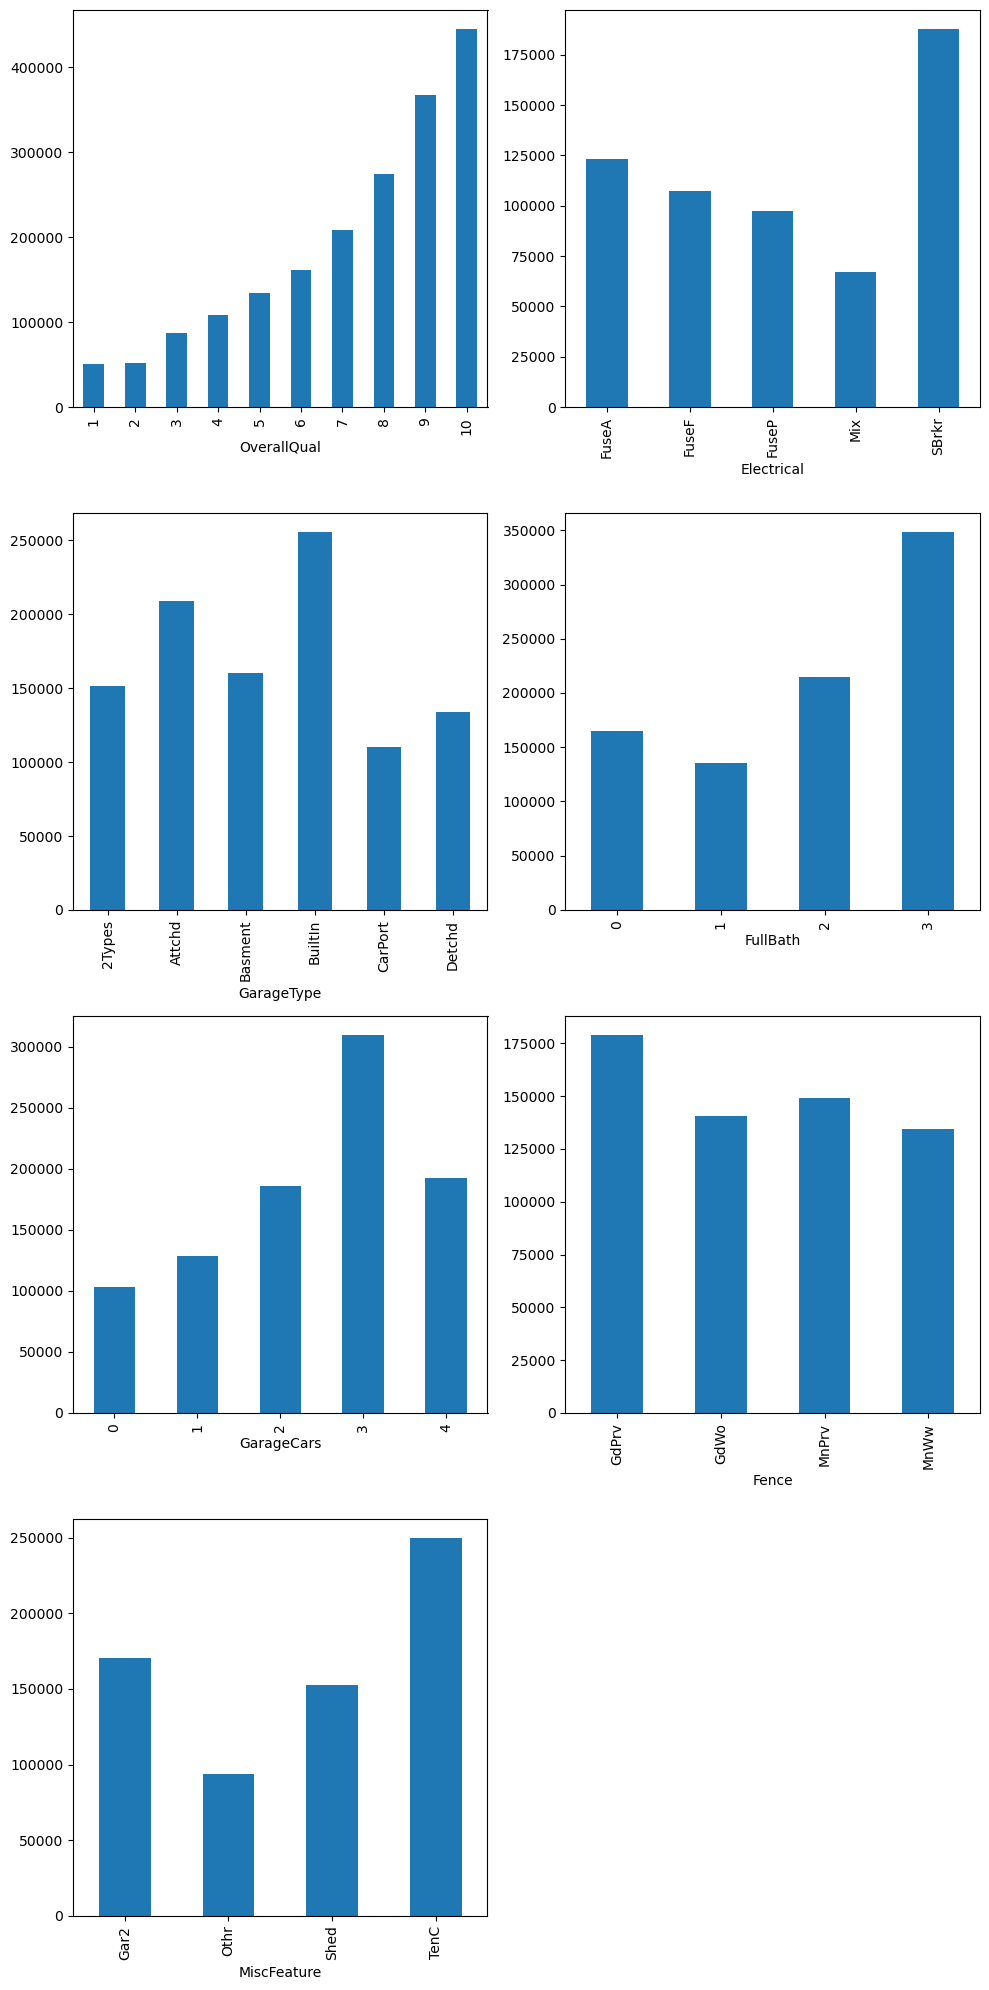

In [24]:
plt.figure(figsize=(10,20))
t=1
for i in cat_cols:
    plt.subplot(4,2,t)
    data.groupby(by=i)['SalePrice'].mean().plot(kind='bar')
    t+=1
plt.tight_layout()
plt.show()


* Inferences

In [25]:
# Treat the defects in the dataset
# treat the missing values and the outliers

In [26]:
# Missing value treatment 
# closest fit
# central value imputation
# deletion


In [27]:
((data.isnull().sum()/data.shape[0])*100).sort_values(ascending=False)

MiscFeature    96.332863
Fence          80.959097
GarageType     10.084626
Electrical      0.070522
OverallQual     0.000000
YearBuilt       0.000000
TotalBsmtSF     0.000000
GrLivArea       0.000000
FullBath        0.000000
GarageCars      0.000000
GarageArea      0.000000
SalePrice       0.000000
dtype: float64

In [28]:
data[data['GarageType'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
8,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
22,5,1968,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000
26,5,1957,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500
37,4,1955,0,FuseP,1152,2,NaN,0,0,NaN,NaN,82000
39,5,1959,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000
...,...,...,...,...,...,...,...,...,...,...,...,...
1387,5,1940,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000
1407,5,1970,630,SBrkr,630,1,NaN,0,0,NaN,NaN,92000
1408,5,1974,896,SBrkr,1792,2,NaN,0,0,NaN,NaN,136000
1411,5,2006,1140,SBrkr,1140,1,NaN,0,0,NaN,NaN,84500


In [29]:
data['GarageType'] = np.where((data['GarageCars']==0) & (data['GarageArea']==0),
                             'NoGarage',data['GarageType'])

In [30]:
data[(data['GarageCars']==1)]['GarageType'].mode()

0    Detchd
Name: GarageType, dtype: object

In [31]:
data['GarageType'] = np.where(data['GarageType'].isnull(),'Detchd',data['GarageType'])

In [32]:
data['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'NoGarage', 'Basment',
       '2Types'], dtype=object)

In [33]:
data[data['Electrical'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
1339,5,2006,384,NaN,1394,2,BuiltIn,2,400,NaN,NaN,167500


In [34]:
data['Electrical'].mode()

0    SBrkr
Name: Electrical, dtype: object

In [35]:
data['Electrical'].fillna(data['Electrical'].mode()[0],inplace=True)

In [36]:
# lets delete the miscfeature and fence
data.drop(columns=['Fence','MiscFeature'],inplace=True)

In [37]:
((data.isnull().sum()/data.shape[0])*100).sort_values(ascending=False)

OverallQual    0.0
YearBuilt      0.0
TotalBsmtSF    0.0
Electrical     0.0
GrLivArea      0.0
FullBath       0.0
GarageType     0.0
GarageCars     0.0
GarageArea     0.0
SalePrice      0.0
dtype: float64

In [38]:
# Outlier treatment

In [39]:
# GrlivArea
data[data['GrLivArea']>5000]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1260,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,160000


In [40]:
# TotalBsmtSF
data[data['TotalBsmtSF']>6000]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1260,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,160000


In [41]:
# SalePrice
data[data['SalePrice']>700000]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
665,10,1994,2444,SBrkr,4316,3,Attchd,3,832,755000
1147,10,1996,2396,SBrkr,4476,3,Attchd,3,813,745000


In [42]:
# We can drop these three points
data.drop(index=[1260,665,1147],inplace=True)

## Capping 

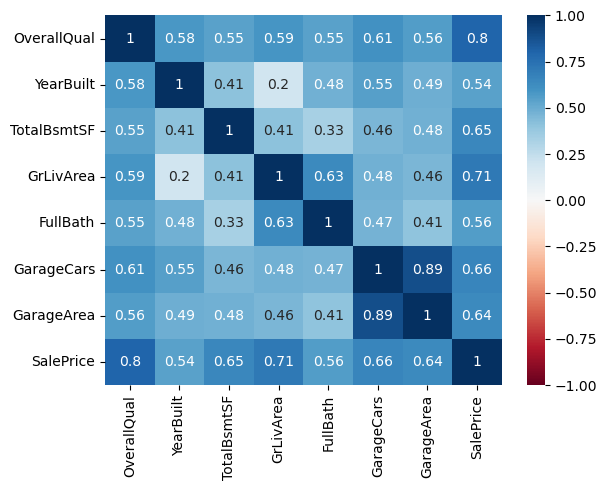

In [43]:
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1,cmap='RdBu');

In [44]:
# treat all the object datatypes with appropriate encoding technique

In [45]:
# One hot encoder 
# Dummy encoding
# label encoding
# Target encoding
# Frequency ecoding

In [46]:
data[data.select_dtypes('object').columns]

,Electrical,GarageType
0,SBrkr,Attchd
1,SBrkr,Attchd
2,SBrkr,Attchd
3,SBrkr,Detchd
4,SBrkr,Attchd
...,...,...
1413,SBrkr,Attchd
1414,SBrkr,Attchd
1415,SBrkr,Attchd
1416,FuseA,Detchd


In [47]:
data['Electrical'].value_counts()

SBrkr    1298
FuseA      89
FuseF      24
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [48]:
data['GarageType'].value_counts()

Attchd      797
Detchd      416
BuiltIn      87
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: GarageType, dtype: int64

In [49]:
data['Electrical'] = np.where(data['Electrical']=='SBrkr',1,0)

In [50]:
data.Electrical.value_counts()

1    1298
0     117
Name: Electrical, dtype: int64

In [51]:
map_data = data['GarageType'].value_counts().to_dict()

In [52]:
map_data  

{'Attchd': 797,
 'Detchd': 416,
 'BuiltIn': 87,
 'NoGarage': 81,
 'Basment': 19,
 'CarPort': 9,
 '2Types': 6}

In [53]:
# map_data = np.round(data.groupby(by='GarageType')['SalePrice'].mean(),0).to_dict()
# for target encoding

In [54]:
map_data

{'Attchd': 797,
 'Detchd': 416,
 'BuiltIn': 87,
 'NoGarage': 81,
 'Basment': 19,
 'CarPort': 9,
 '2Types': 6}

In [55]:
data['GarageType']=data['GarageType'].map(map_data)

In [56]:
data

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
0,7,2003,856,1,1710,2,797,2,548,208500
1,6,1976,1262,1,1262,2,797,2,460,181500
2,7,2001,920,1,1786,2,797,2,608,223500
3,7,1915,756,1,1717,1,416,3,642,140000
4,8,2000,1145,1,2198,2,797,3,836,250000
...,...,...,...,...,...,...,...,...,...,...
1413,6,1999,953,1,1647,2,797,2,460,175000
1414,6,1978,1542,1,2073,2,797,2,500,210000
1415,7,1941,1152,1,2340,2,797,1,252,266500
1416,5,1950,1078,0,1078,1,416,1,240,142125


###  Power Transformation 

In [57]:
num_cols

['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'SalePrice']

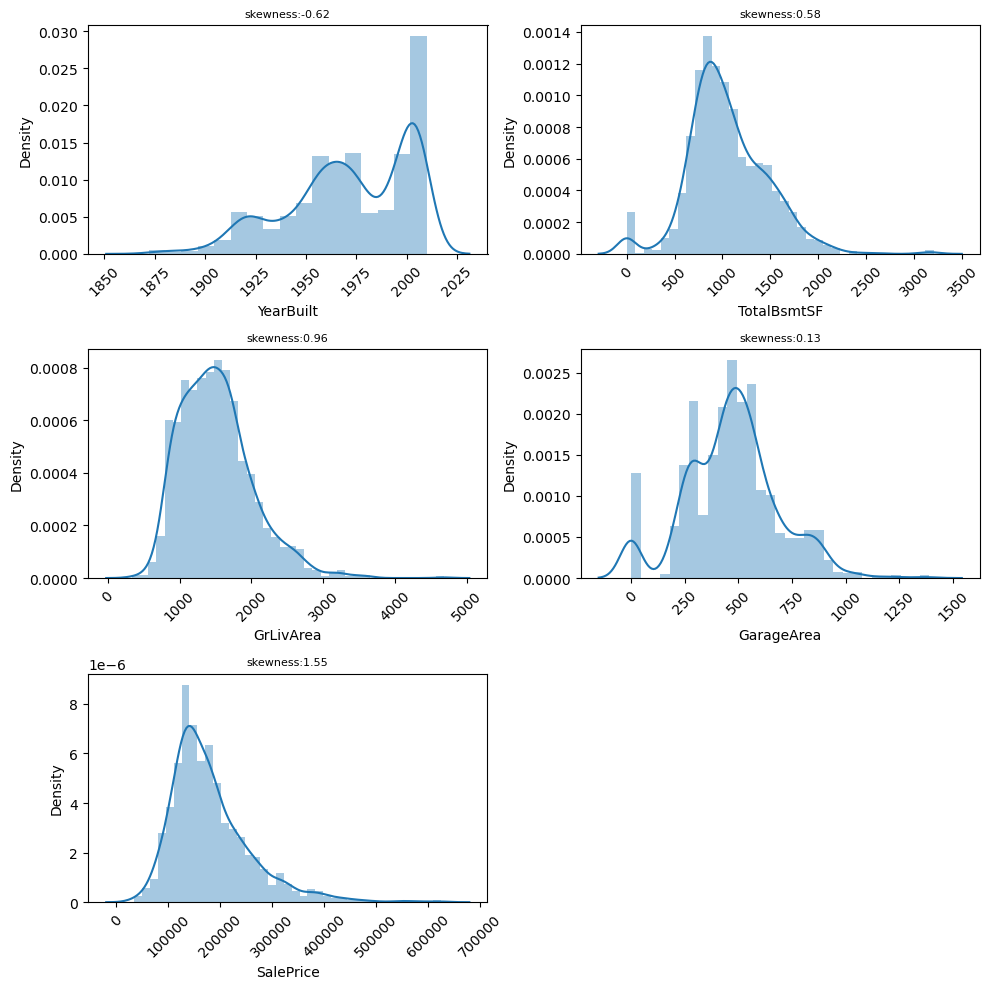

In [58]:
t = 1 
plt.figure(figsize=(10,10))
for i in num_cols:
    plt.subplot(3,2,t)
    sns.distplot(data[i])
    plt.title(f'skewness:{round(data[i].skew(),2)}',fontsize=8)
    t+=1
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Skewness0.79'}>

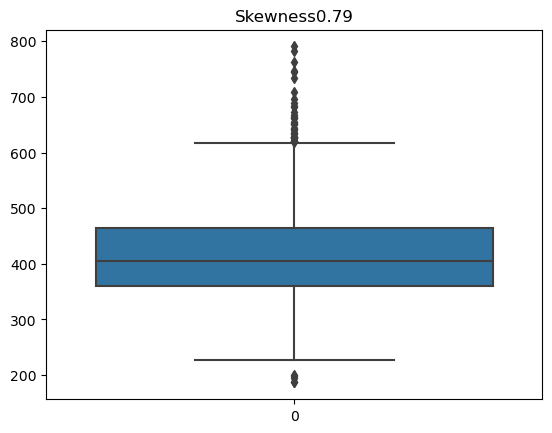

In [59]:
sqrt_sale = np.sqrt(data['SalePrice'])
plt.title(f'Skewness{round(sqrt_sale.skew(),2)}')
sns.boxplot(sqrt_sale)

In [60]:
from statsmodels.graphics.gofplots import qqplot

<Figure size 300x300 with 0 Axes>

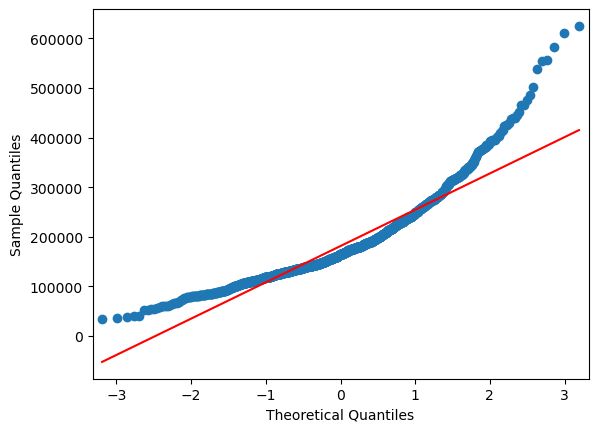

In [61]:
plt.figure(figsize=(3,3))
qqplot(data['SalePrice'],line='r')
plt.show()

<Figure size 300x300 with 0 Axes>

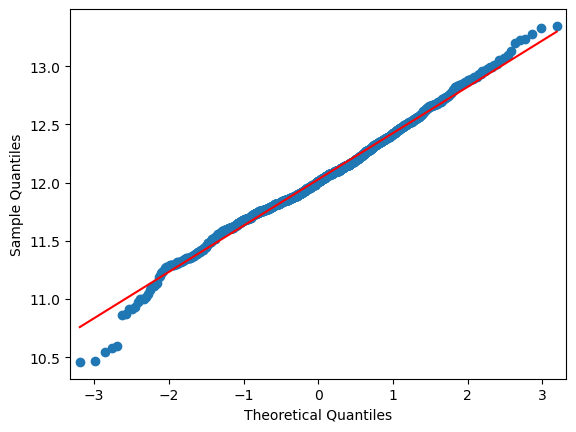

In [62]:
plt.figure(figsize=(3,3))
qqplot(np.log(data['SalePrice']),line='r')
plt.show()

<Axes: xlabel='SalePrice', ylabel='Density'>

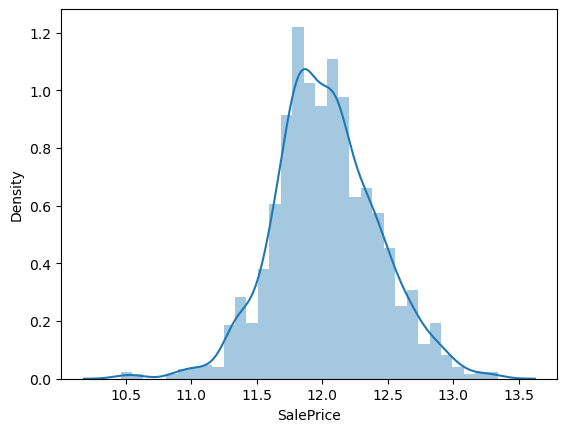

In [63]:
sns.distplot(np.log(data['SalePrice']))

In [64]:
# box cox 
# yeo johnson

In [65]:
from sklearn.preprocessing import PowerTransformer

In [66]:
pt = PowerTransformer(method='box-cox',standardize=False) # yeo johnson

In [67]:
tran_sale = pt.fit_transform(pd.DataFrame(data['SalePrice']))

In [68]:
pt.lambdas_

array([-0.02793469])

In [69]:
pt.inverse_transform(tran_sale)

array([[208500.],
       [181500.],
       [223500.],
       ...,
       [266500.],
       [142125.],
       [147500.]])

In [70]:
PowerTransformer(pd.DataFrame(data['SalePrice']))

PowerTransformer(method=      SalePrice
0        208500
1        181500
2        223500
3        140000
4        250000
...         ...
1413     175000
1414     210000
1415     266500
1416     142125
1417     147500

[1415 rows x 1 columns])

In [71]:
import scipy.stats as stats

In [72]:
stats.skew(tran_sale[:,0])

-0.002570778870127431

<Figure size 300x300 with 0 Axes>

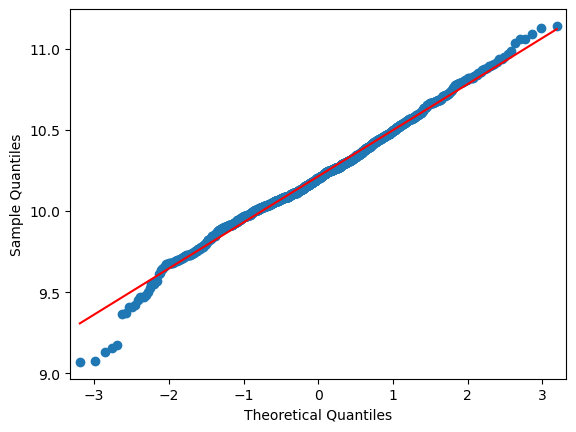

In [73]:
plt.figure(figsize=(3,3))
qqplot(tran_sale[:,0],line='r')
plt.show()

## ***Train Test Split***

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x = data.drop(columns=['SalePrice'])
y = data['SalePrice']

In [76]:
data.shape

(1415, 10)

In [77]:
train_x,test_x,train_y,test_y = train_test_split(x,y,train_size=0.75)

In [78]:
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(1061, 9) (354, 9) (1061,) (354,)


### ***Scaling***

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
sc = StandardScaler()

In [81]:
for i in num_cols:
    if i!= 'SalePrice':      
        sc = StandardScaler()
        train_x[i] = sc.fit_transform(pd.DataFrame(train_x[i]))
        test_x[i] = sc.transform(pd.DataFrame(test_x[i]))

In [82]:
train_x

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea
1098,6,-3.038898,-0.125073,1,1.358689,2,416,1,-1.250629
715,7,0.928784,0.704806,1,-0.348077,2,797,2,0.316312
301,9,1.127168,0.461440,1,2.123859,3,797,3,1.728435
216,6,-0.030072,-1.402748,1,-1.065672,1,416,1,-0.973834
604,6,-0.261520,0.459006,1,-0.346095,1,797,2,0.227174
...,...,...,...,...,...,...,...,...,...
1383,5,-0.459905,-0.086135,1,-0.357989,1,416,1,0.058283
385,6,-1.187313,0.011212,0,0.226792,1,416,1,-1.086428
1057,7,0.895720,-1.118009,1,-0.540361,2,416,2,-0.044929
10,9,1.094104,0.281349,1,1.584672,3,87,3,1.240525


### *********************Statistical Analysis*********************

Key Inferences: Salesprice is highly affected
* BuildQual - cat
* GrlivArea - num
* GarageArea - num
* TotalArea - num
* fullbath - cat

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

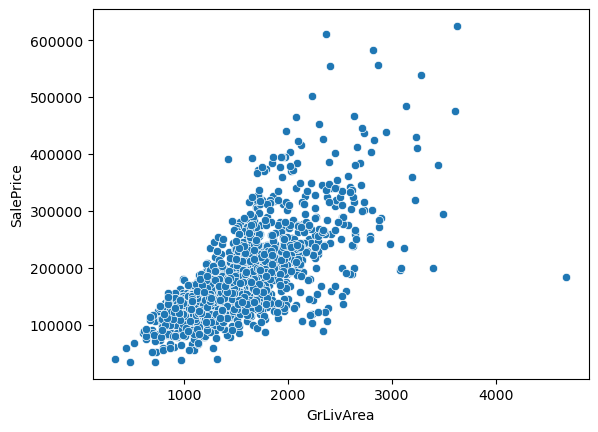

In [83]:
# Saleprice and GrlivArea
sns.scatterplot(x=data['GrLivArea'],y=data['SalePrice'])

In [84]:
data[['SalePrice','GrLivArea']].corr()

,SalePrice,GrLivArea
SalePrice,1.00000,0.71203
GrLivArea,0.71203,1.00000


In [85]:
# two sample t test ( test for independence)
# assumptions : data must be normal
# samples must have equal variance

In [86]:
from scipy.stats import shapiro , levene,stats,mannwhitneyu , pearsonr,kruskal

In [87]:
p=shapiro(data['SalePrice'])[1]
if p>0.05:
    print('Ho: Data is Normal')
else:
    print('Ho: Data is not Normal')

Ho: Data is not Normal


In [88]:
# in this case we have to use non parametric test (mannwhitneyu)

In [89]:
p = mannwhitneyu(data['SalePrice'],data['GrLivArea'])[1]
if p > 0.05:
    print('Ho: The two samples are independent')
else:
    print('Ha: The two samples are dependent')

Ha: The two samples are dependent


In [90]:
p = pearsonr(data['SalePrice'],data['GrLivArea'])[1]
if p>0.05:
    print('Ho: Two samples are non correlated')
else:
    print('Ha: Two samples are correlated')

Ha: Two samples are correlated


In [91]:
p = mannwhitneyu(data['SalePrice'],data['GarageArea'])[1]
if p > 0.05:
    print('Ho: The two samples are independent')
else:
    print('Ha: The two samples are dependent')
print(p)

Ha: The two samples are dependent
0.0


In [92]:
p = pearsonr(data['SalePrice'],data['GarageArea'])[1]
if p>0.05:
    print('Ho: Two samples are non correlated')
else:
    print('Ha: Two samples are correlated')

Ha: Two samples are correlated


In [93]:
# For Cat vs Num : Anova~Kruskal wallis

In [94]:
# lets create  samples
data['OverallQual'].value_counts()

samp1 = data[data['OverallQual']==1]['SalePrice']
samp2 = data[data['OverallQual']==2]['SalePrice']
samp3 = data[data['OverallQual']==3]['SalePrice']
samp4 = data[data['OverallQual']==4]['SalePrice']
samp5 = data[data['OverallQual']==5]['SalePrice']
samp6 = data[data['OverallQual']==6]['SalePrice']
samp7 = data[data['OverallQual']==7]['SalePrice']
samp8 = data[data['OverallQual']==8]['SalePrice']
samp9 = data[data['OverallQual']==9]['SalePrice']
samp10 = data[data['OverallQual']==10]['SalePrice']

p = kruskal(samp1,samp2,samp3,samp4,samp5,samp6,samp7,samp8,samp9,samp10)[1]
if p>0.05:
    print('Ho: There is no relation between columns')
else:
    print('Ha:There is significant relation between columns')

Ha:There is significant relation between columns


## ***Analysing fence and Misc features***

In [95]:
# original Data set
df = pd.read_csv('housing_data.csv')

In [96]:
df.head(2)

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500


In [97]:
df['Fence'].value_counts()

MnPrv    148
GdPrv     58
GdWo      53
MnWw      11
Name: Fence, dtype: int64

In [98]:
df['Fence'] = np.where(df['Fence'].isnull(),'No','yes')

In [99]:
df['Fence'].value_counts()

No     1148
yes     270
Name: Fence, dtype: int64

In [100]:
samp1 = df[df['Fence']=='yes']['SalePrice']
samp2 = df[df['Fence']=='No']['SalePrice']

p = mannwhitneyu(samp1,samp2)[1]
if p>0.05:
    print('Ho: mu1 = mu2')
else:
    print('Ha: mu1 != mu2')

Ha: mu1 != mu2


In [101]:
df['MiscFeature'].value_counts()

Shed    47
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [102]:
df['MiscFeature'] = np.where(df['MiscFeature'].isnull(),'No','yes')

In [103]:
df['MiscFeature'].value_counts()

No     1366
yes      52
Name: MiscFeature, dtype: int64

In [104]:
samp1 = df[df['MiscFeature']=='yes']['SalePrice']
samp2 = df[df['MiscFeature']=='No']['SalePrice']

p = mannwhitneyu(samp1,samp2)[1]
if p>0.05:
    print('Ho: mu1 = mu2')
else:
    print('Ha: mu1 != mu2')

Ha: mu1 != mu2


In [105]:
data

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
0,7,2003,856,1,1710,2,797,2,548,208500
1,6,1976,1262,1,1262,2,797,2,460,181500
2,7,2001,920,1,1786,2,797,2,608,223500
3,7,1915,756,1,1717,1,416,3,642,140000
4,8,2000,1145,1,2198,2,797,3,836,250000
...,...,...,...,...,...,...,...,...,...,...
1413,6,1999,953,1,1647,2,797,2,460,175000
1414,6,1978,1542,1,2073,2,797,2,500,210000
1415,7,1941,1152,1,2340,2,797,1,252,266500
1416,5,1950,1078,0,1078,1,416,1,240,142125


## Modelling:

In [106]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

In [107]:
trainx , testx,trainy,testy = train_test_split(x,y,random_state=10,train_size=0.75)

In [108]:
print(trainx.shape , testx.shape,trainy.shape,testy.shape)

(1061, 9) (354, 9) (1061,) (354,)


In [109]:
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(1061, 9) (354, 9) (1061,) (354,)


In [110]:
perf_table = pd.DataFrame(columns=['Model','Test Data','R2_score','MSE','RMSE','MAE','MAPE'])
def model_perf(name,data,model,trainx,trainy,testx,testy):
    m = model
    m.fit(trainx,trainy)
    pred = m.predict(testx)
    a = mean_squared_error(testy,pred)
    b = np.sqrt(mean_squared_error(testy,pred))
    c = mean_absolute_error(testy,pred)
    d = mean_absolute_percentage_error(testy,pred)
    f = r2_score(testy,pred)
    global perf_table
    perf_table = perf_table.append({'Model':name,
                                    'Test Data':data,
                                    'R2_score': f,
                                    'MSE':a,
                                    'RMSE':b,
                                    'MAE':c,
                                    'MAPE':d},
                                   ignore_index = True)

In [111]:
model_perf(name='Random Forest',data='Train',model=RandomForestRegressor(n_estimators=200,max_depth=5),
          trainx=trainx,trainy=trainy,testx=trainx,testy=trainy)
model_perf(name='Random Forest',data='Test',model=RandomForestRegressor(n_estimators=200,max_depth=5),
          trainx=trainx,trainy=trainy,testx=testx,testy=testy)
model_perf(name='Decision Tree',data='Train',model=DecisionTreeRegressor(max_depth=3),trainx=trainx,trainy=trainy,
          testx=trainx,testy=trainy)
model_perf(name='Decision Tree',data='Test',model=DecisionTreeRegressor(max_depth=3),trainx=trainx,trainy=trainy,
          testx=testx,testy=testy)

In [112]:
model_perf(name='Gradient Boosting',data='Train',model=GradientBoostingRegressor(n_estimators=200,max_depth=5),trainx=trainx,trainy=trainy,
          testx=trainx,testy=trainy)

In [113]:
model_perf(name='Gradient Boosting',data='Test',model=GradientBoostingRegressor(n_estimators=200,max_depth=5),trainx=trainx,trainy=trainy,
          testx=testx,testy=testy)

In [114]:
from xgboost import XGBClassifier
model_perf(name='Extreme Gradient Boosting',data='Train',model=XGBRegressor(n_estimators=150,gamma=2),trainx=trainx,trainy=trainy,
          testx=trainx,testy=trainy)
model_perf(name='Extreme Gradient Boosting',data='Test',model=XGBRegressor(n_estimators=150,gamma=2),trainx=trainx,trainy=trainy,
          testx=testx,testy=testy)

In [115]:
def model_validation(model,trainx,trainy,testx,testy):
    m = model
    m.fit(trainx,trainy)
    pred = m.predict(testx)
    print('MSE',mean_squared_error(test_y,pred))
    print('RMSE',np.sqrt(mean_squared_error(test_y,pred)))
    print('MAE',mean_absolute_error(test_y,pred))
    print('MAPE',mean_absolute_percentage_error(test_y,pred))
    r2 = r2_score(test_y,pred)
    print('R Squared:',r2)

In [116]:
model_validation(KNeighborsRegressor(),trainx,trainy,testx,testy)

MSE 10091918774.373333
RMSE 100458.54256544504
MAE 75811.6847457627
MAPE 0.4931836363267778
R Squared: -0.7005527603562336


In [117]:
model_perf(name='KNN',data='Test',model=KNeighborsRegressor(),trainx=trainx,trainy=trainy,
          testx=testx,testy=testy)

In [122]:
model_perf(name='KNN',data='Train',model=KNeighborsRegressor(),trainx=trainx,trainy=trainy,
          testx=trainx,testy=trainy)

In [123]:
perf_table

,Model,Test Data,R2_score,MSE,RMSE,MAE,MAPE
0,Random Forest,Train,0.894735,6.406434e+08,25310.934345,17755.526723,0.110708
1,Random Forest,Test,0.833714,9.186988e+08,30310.044049,21443.427968,0.132877
2,Decision Tree,Train,0.736810,1.601776e+09,40022.191430,27828.609336,0.169441
3,Decision Tree,Test,0.702001,1.646390e+09,40575.726462,28599.546015,0.178327
4,Gradient Boosting,Train,0.989642,6.304111e+07,7939.843037,6118.545477,0.039613
5,Gradient Boosting,Test,0.863994,7.514104e+08,27411.866154,18837.978845,0.112369
6,Extreme Gradient Boosting,Train,0.999426,3.494792e+06,1869.436373,1302.603385,0.008446
7,Extreme Gradient Boosting,Test,0.830871,9.344083e+08,30568.092047,20945.029065,0.125162
8,KNN,Test,0.770537,1.267743e+09,35605.372550,25131.941243,0.149935
9,KNN,Train,0.818867,1.102376e+09,33202.053674,21000.103676,0.124689


In [124]:
rf = RandomForestRegressor()
rf.fit(trainx,trainy)
pred = rf.predict(testx)
r2_score(testy,pred)

0.8543058557462941

In [136]:
params = {'n_estimators':[50,100,200,300,400,500,600,700],'max_samples':[10,8,6,12,14,15],'max_depth':[3,4,5,6,7,8,9]}

In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
gscv = GridSearchCV(estimator = RandomForestRegressor(),param_grid=params,scoring='r2',n_jobs=-1)
model = gscv.fit(trainx,trainy)

In [139]:
model.best_params_

{'max_depth': 8, 'max_samples': 15, 'n_estimators': 300}

In [141]:
rf = RandomForestRegressor(max_depth= 8,max_samples= 15, n_estimators = 300)
rf.fit(trainx,trainy)
pred = rf.predict(testx)
r2_score(testy,pred)

0.7331125313349812

In [142]:
rf = RandomForestRegressor()
rf.fit(trainx,trainy)
pred = rf.predict(testx)
r2_score(testy,pred)

0.8587940212728709

* Random Forest Regressor gives the best r2 which is 0.8587 which is a good r2.

# END.......